### 1) CHECK THAT THE PLOTS ARE REPRESENTING THE FEATURES BY THE CLUSTERS THE COMPUTER HAS CHOSEN SO CAN SEE WHAT SOCIOECONOMIC FEATURES EACH CLUSTER HAS - can also see the initial clustering plot e.g. green is mainly low spending score
### DONE 2) WHEN PREPROCESSING DATA, CALL IT data_preprocess so not confused if call it data and it overwritten or make a function of how want to preprocess so can put in any input (pass any data) and does the same actions to it --> THIS IS HOW YOU AUTOMATE!! LIGHTBULB [what ellen wants with credit card data, pass the data through function and will automatically calculate growths between different coloumns etc...  --> just make sure what the coloumns are called is consistent to what code will pickup so put a note]  

### 3) MAKE THE NON-STACKED BAR CHART GROUPS A FUNCTION SO CAN PASS ALL THE cluster RESULTS from algorithms THROUGH THAT TO VISUALISE WHAT THE FEATURE COMPOSITION OF EACH CLUSTER IS THAT THE COMPUTER GENERATES!

4) check for hierarchical clustering if scaling is needed as only use datapreprocess here before run through sclaing

### Customer Segmentation - Unsupervised learning

Instead of just using a one-way approach for all customers, customer segmentation is a key tool for businesses as it divides a customer base into distinct groups based on common characteristics such as demographics, spending, and behavious which enables businesses to target each group more effectively with tailored market stratgeies and product offerings. 

This project works with an automobile company to help them on their route to market by using customer data and unsupervised learning techniques. Unsupervised learning enables customer segmentation by using algorithms to analyze data and identify patterns without pre-labeled outcomes. This allows models to uncover hidden insights and group customers based on natural similarities, expanding perspectives beyond traditional segmentation methods and revealing new, data-driven customer segments.

Following this, we can dive further to understand the characteristics of each segment to create profiles for each group. This can guide marketing strategies and product recommendations for more efficiency and profitability

Importing Libraries

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')





Importing Dataset

In [5]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')


df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
# Drop directly ID in the dataset as this feature is not needed for customer segmentation

df_train.drop(['ID'],axis=1, inplace=True)

In [7]:
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Data Analysis and Exploration

In [8]:
df_train.shape

(8068, 10)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [10]:
df_train.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [11]:
for column in ['Gender','Ever_Married','Graduated','Profession','Segmentation']:
    print(df_train[column].value_counts())

Gender
Male      4417
Female    3651
Name: count, dtype: int64
Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64
Graduated
Yes    4968
No     3022
Name: count, dtype: int64
Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64
Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64


In [12]:
column_names = df_train.columns.tolist()
column_names

['Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1',
 'Segmentation']

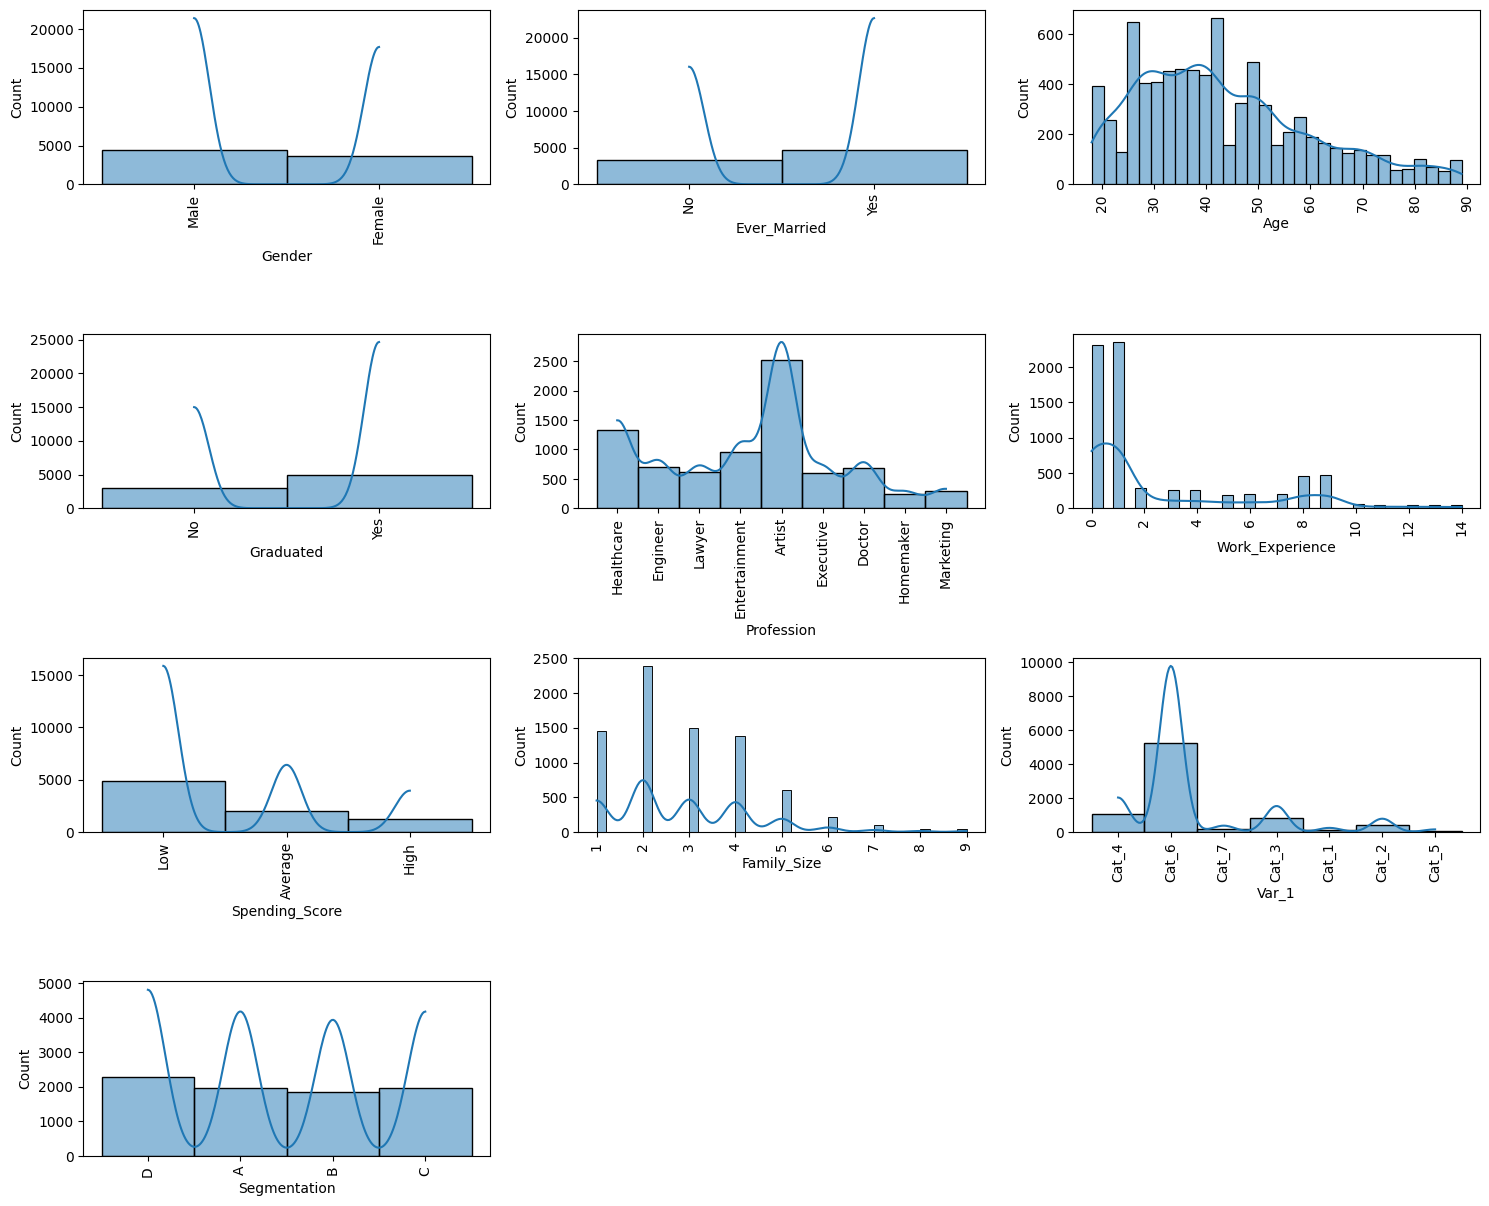

In [13]:
plt.figure(figsize=(15,15))
for i, col in enumerate(column_names, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data=df_train[col], kde=True)
    plt.xticks(rotation=90)
    plt.tight_layout()

We can see in the customer data:
- there are slightly more males than females
- slightly more people that have ever been married
- age is skewed to middle-aged (30s-40s)
- slightly more have gradutaed
- there are a LOT of artists in the dataset
- work experience level is skewed to the lower levels
- most of the dataset have a low spending score 
- majority of the dataset has a family size of 4 or less, with most just having a partner

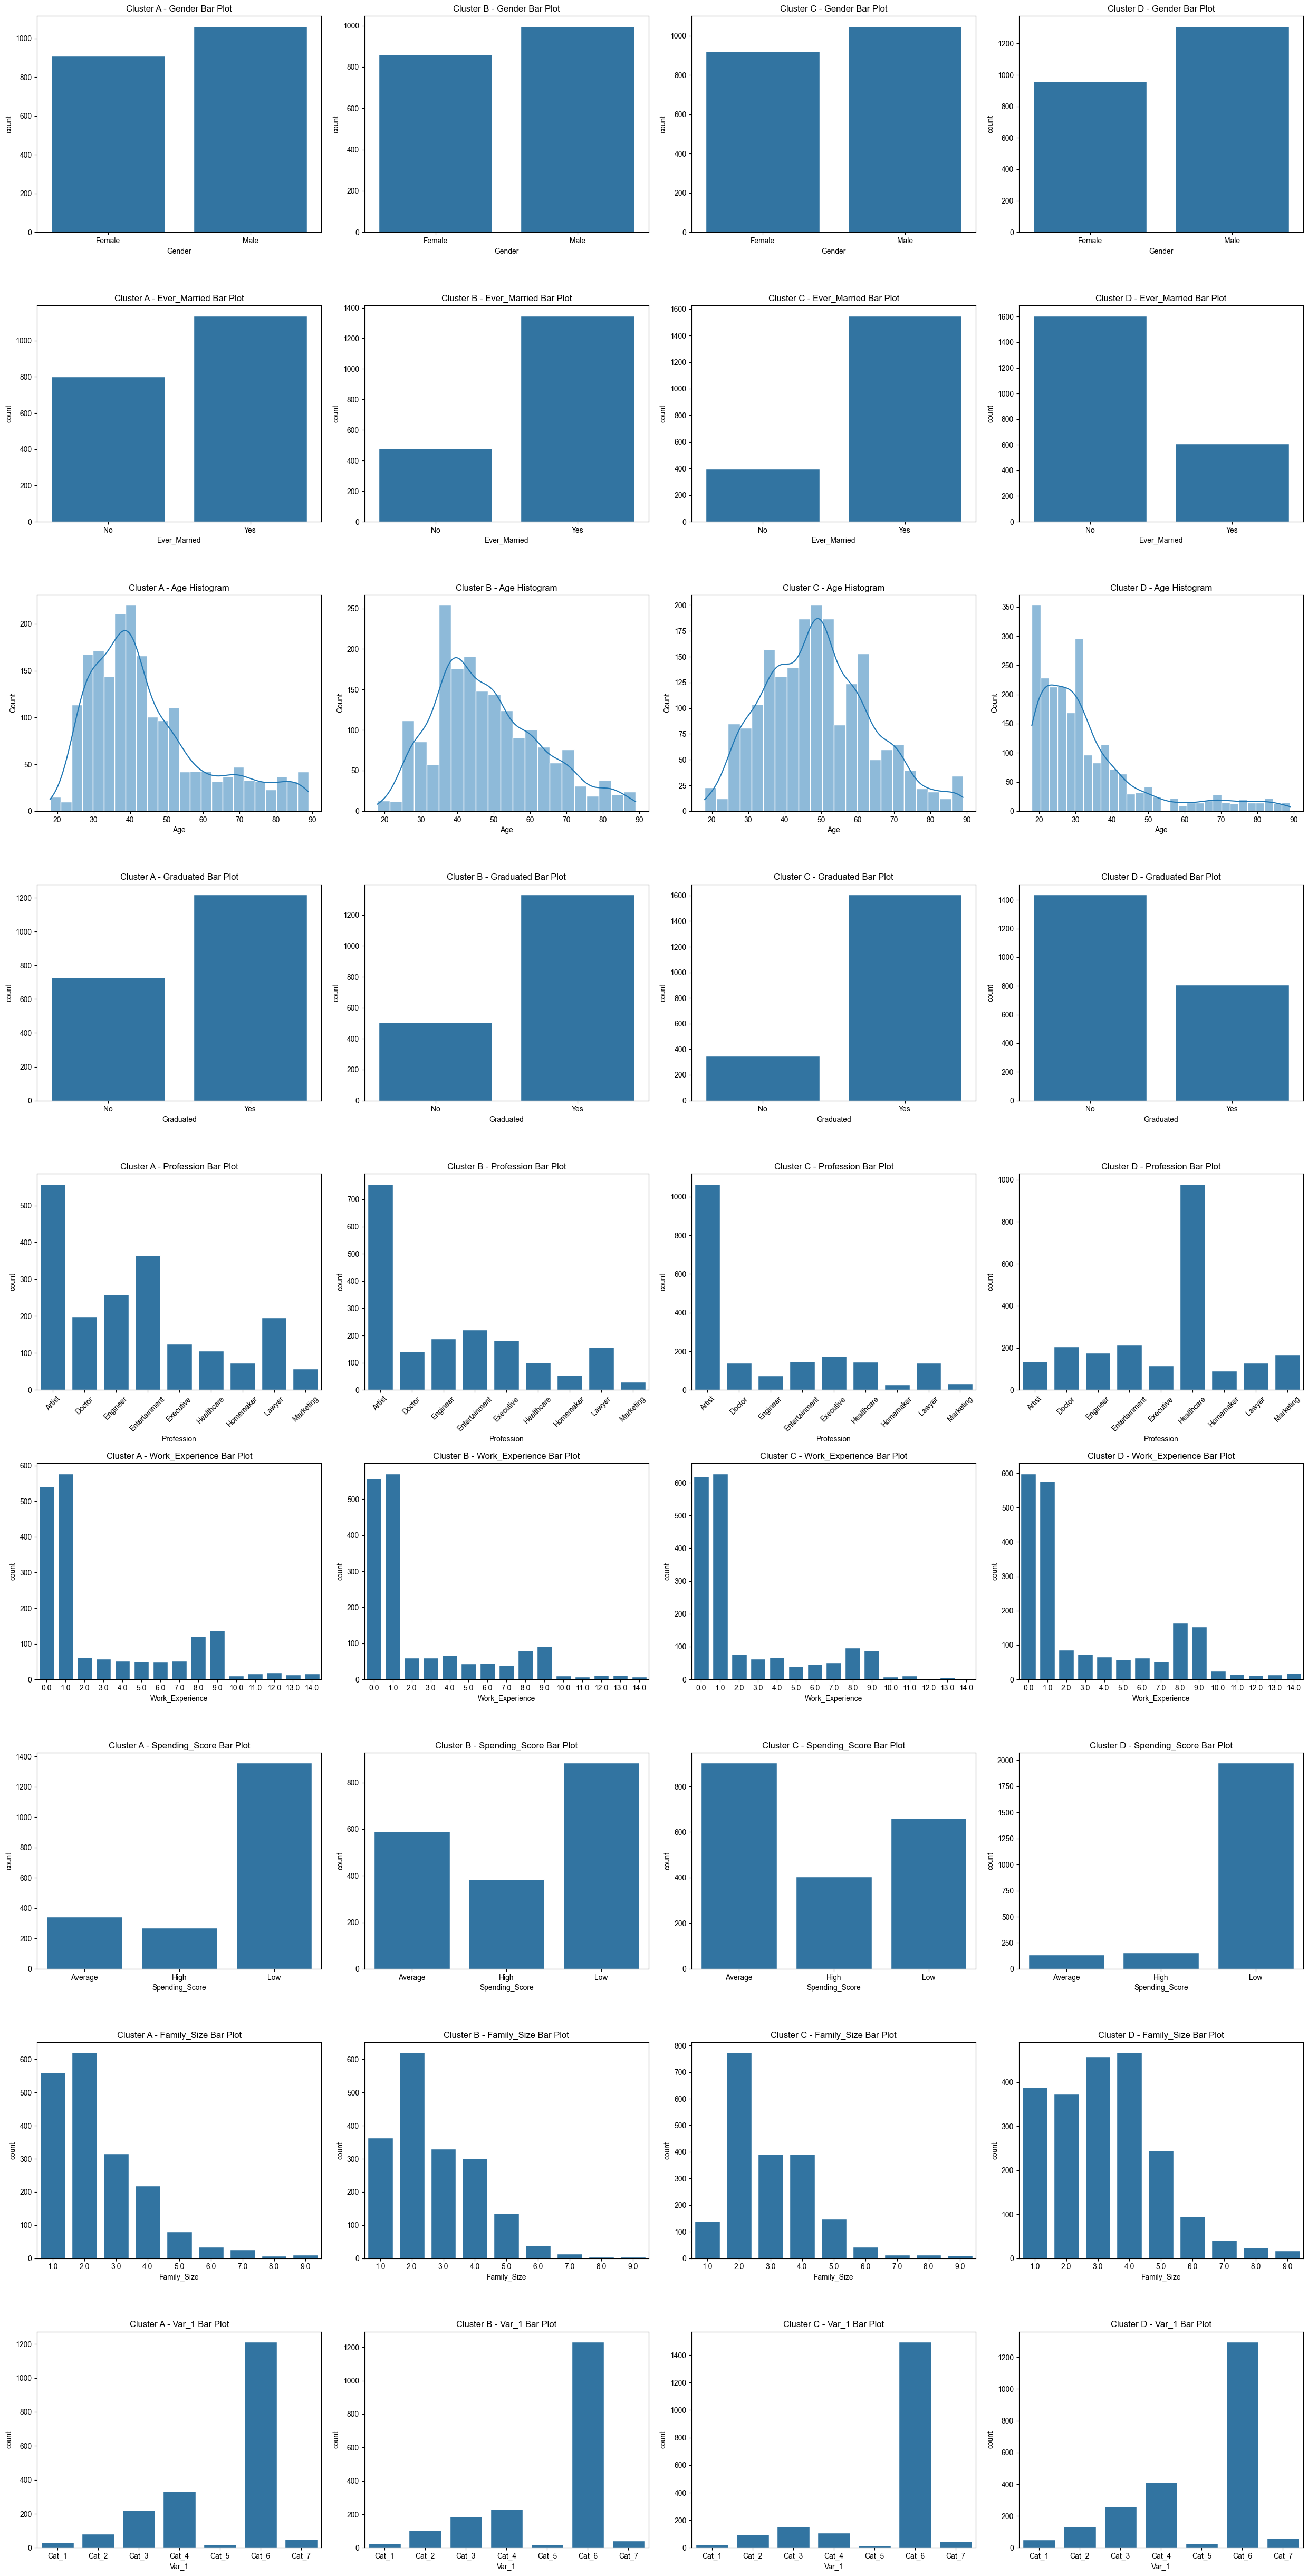

In [14]:
# 4 original segmentations and order them in alphabetical order
num_clusters = df_train['Segmentation'].nunique()
clusters = df_train['Segmentation'].unique()
clusters.sort()

# Select columns for which you want to plot distributions
columns_to_plot = df_train.columns

# Create a grid of subplots
fig, axes = plt.subplots(len(columns_to_plot)-1, num_clusters, figsize=(25, 5*len(columns_to_plot)-1))

# Iterate over each column category one by one
for i, column in enumerate(columns_to_plot):
    if column != 'Segmentation':
      if column == 'Age':  # For 'age' column, plot histogram
          # Iterate over each cluster
          for cluster in clusters:
              # Select data for current cluster
              data = df_train[df_train['Segmentation'] == cluster][column]
              sns.set(style='dark')
              # Plot the histogram in the corresponding subplot
              sns.histplot(data, kde=True, ax=axes[i, np.where(clusters == cluster)[0][0]])

              # Set title for the subplot
              axes[i, np.where(clusters == cluster)[0][0]].set_title(f'Cluster {cluster} - {column} Histogram')
      else:  # For other columns, plot bar plot
         # Iterate over each cluster
            for cluster in clusters:
                # Select data for current cluster
                data = df_train[df_train['Segmentation'] == cluster]
                sns.set(style='dark')
                ax = axes[i, np.where(clusters == cluster)[0][0]]
                # Plot the bar plot in the corresponding subplot and specify the order for the countplot if it is string by adding part in code ,order.....
                sns.countplot(x=column, data=data, ax=ax, order=sorted(data[column].loc[data[column].apply(lambda x: isinstance(x, str))].unique()) if data[column].dtype == object else None)
                ax.set_title(f'Cluster {cluster} - {column} Bar Plot')
                
                # Rotate x-axis labels for 'Profession' chart
                if column == 'Profession':
                    ax.tick_params(axis='x', rotation=45)
# Adjust layout
plt.tight_layout()
plt.show()



## Pre-Processing

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     8068 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   object 
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      8068 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [23]:
## Replace all the null values with mode if it is a binary category, using mean if it is numerical or median if it has multiple categories

df_train['Ever_Married'].fillna(df_train['Ever_Married'].mode()[0], inplace=True)
df_train['Graduated'].fillna(df_train['Graduated'].mode()[0], inplace=True)
df_train['Profession'].fillna(df_train['Profession'].mode()[0], inplace=True)
df_train['Work_Experience'].fillna(df_train['Work_Experience'].mean(), inplace=True)
df_train['Family_Size'].fillna(df_train['Family_Size'].median(), inplace=True)

In [24]:
## Make all values numerical so encode all non-numerical values to be numerical with Label Encoder (object datatypes)

# Initialize LabelEncoder
le = LabelEncoder()

# Create an empty DataFrame
datapreprocess = pd.DataFrame()

# Encode categorical features and keep numerical features (Age, Work Experience and Family Size) as they are 

columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']

for column in columns_to_encode:
    datapreprocess[column] = le.fit_transform(df_train[column])

datapreprocess[['Age', 'Work_Experience', 'Family_Size']] = df_train[['Age', 'Work_Experience', 'Family_Size']].copy()

datapreprocess.head()


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age,Work_Experience,Family_Size
0,1,0,0,5,2,3,3,22,1.000000,4.0
1,0,1,1,2,0,3,0,38,2.641663,3.0
2,0,1,1,2,2,5,1,67,1.000000,1.0
3,1,1,1,7,1,5,1,67,0.000000,2.0
4,0,1,1,3,1,5,0,40,2.641663,6.0


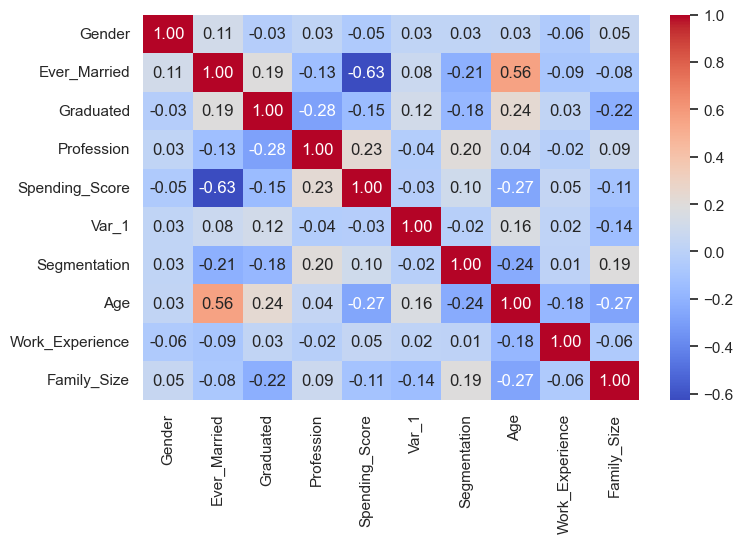

In [25]:
## can look at correlation between all the features as they are all numerical - darker boxes show higher correlations

correlation_matrix = datapreprocess.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [27]:
datapreprocess.isnull().sum()

Gender             0
Ever_Married       0
Graduated          0
Profession         0
Spending_Score     0
Var_1              0
Segmentation       0
Age                0
Work_Experience    0
Family_Size        0
dtype: int64

#### Scale Data (Run one option)

Option 1: Standard Scalar

In [16]:
## standardise all training data with StandardScaler apart from Var_1 and Segmentation as those variables are not needed

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data = scaler.fit_transform(data[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']])
# data

Option 2: MinMax Scalar

Using this option in this situation as preserves the relationships and ratios between the original data points

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(datapreprocess[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']])
data

array([[1.        , 0.        , 0.05633803, ..., 0.07142857, 1.        ,
        0.375     ],
       [0.        , 1.        , 0.28169014, ..., 0.18869023, 0.        ,
        0.25      ],
       [0.        , 1.        , 0.69014085, ..., 0.07142857, 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.21126761, ..., 0.07142857, 1.        ,
        0.        ],
       [0.        , 0.        , 0.12676056, ..., 0.07142857, 1.        ,
        0.375     ],
       [1.        , 1.        , 0.26760563, ..., 0.        , 0.        ,
        0.25      ]])

In [29]:
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


# **Model** **Training**

### K Means Clusters

### Two Features (Age and Spending Score)

In [30]:
## using the index to select variable from the training features
X = data[:, [2,6]]
X

array([[0.05633803, 1.        ],
       [0.28169014, 0.        ],
       [0.69014085, 1.        ],
       ...,
       [0.21126761, 1.        ],
       [0.12676056, 1.        ],
       [0.26760563, 0.        ]])

In order to help determine how many groups we should segment customers into, we use the WCSS (inertia). Below we iterate through 1 to 10 clusters which gives the range we plot on the x axis. By plotting the number of clusters against the WCSS values, we can visually inspect the point of convergence ("elbow") which suggests the optimal number of clusters. This method provides a visual way between balancing having too few clusters (underfitting) and too many clusters (overfitting). The more diverse the dataset, a larger range of clusters can be run.

In [31]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

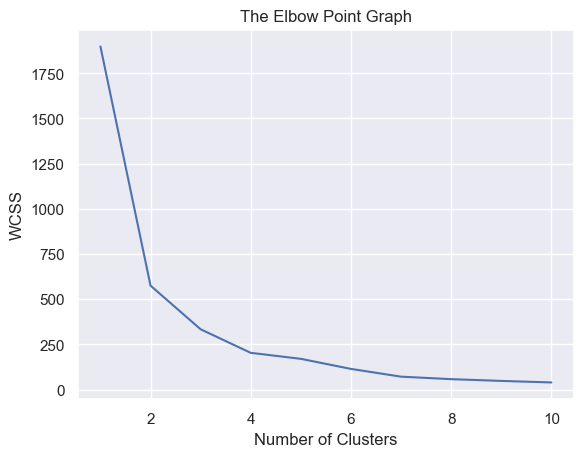

In [32]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above Elow Point graph, we look into running the K Means model with 2-4 clusters and also see from the visualisation of the clusters / silhouette score how many clusters to choose. In this case we choose 3 clusters as the segmentation seems clearest

In [33]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
df_train['Cluster'] = Y
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Cluster
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D,1
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A,0
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B,2
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B,2
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A,2


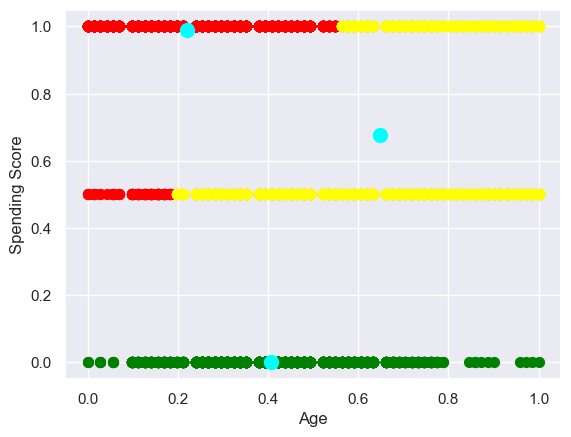

In [34]:
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')

plt.xlabel('Age')
plt.ylabel('Spending Score')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

Can see from the above, that 3 clusters have been formed - green, yellow and red. The bottom cluster is only composed of those with low spending scores, yellow has the most with mid-spending scores and red is a bit dominated by high spending scores

In [35]:
silhouette_avg = silhouette_score(X, Y)
print(silhouette_avg)

0.6271917678548141


Plot each cluster by feature to visualise the socioeconomic composition of the data within each cluster

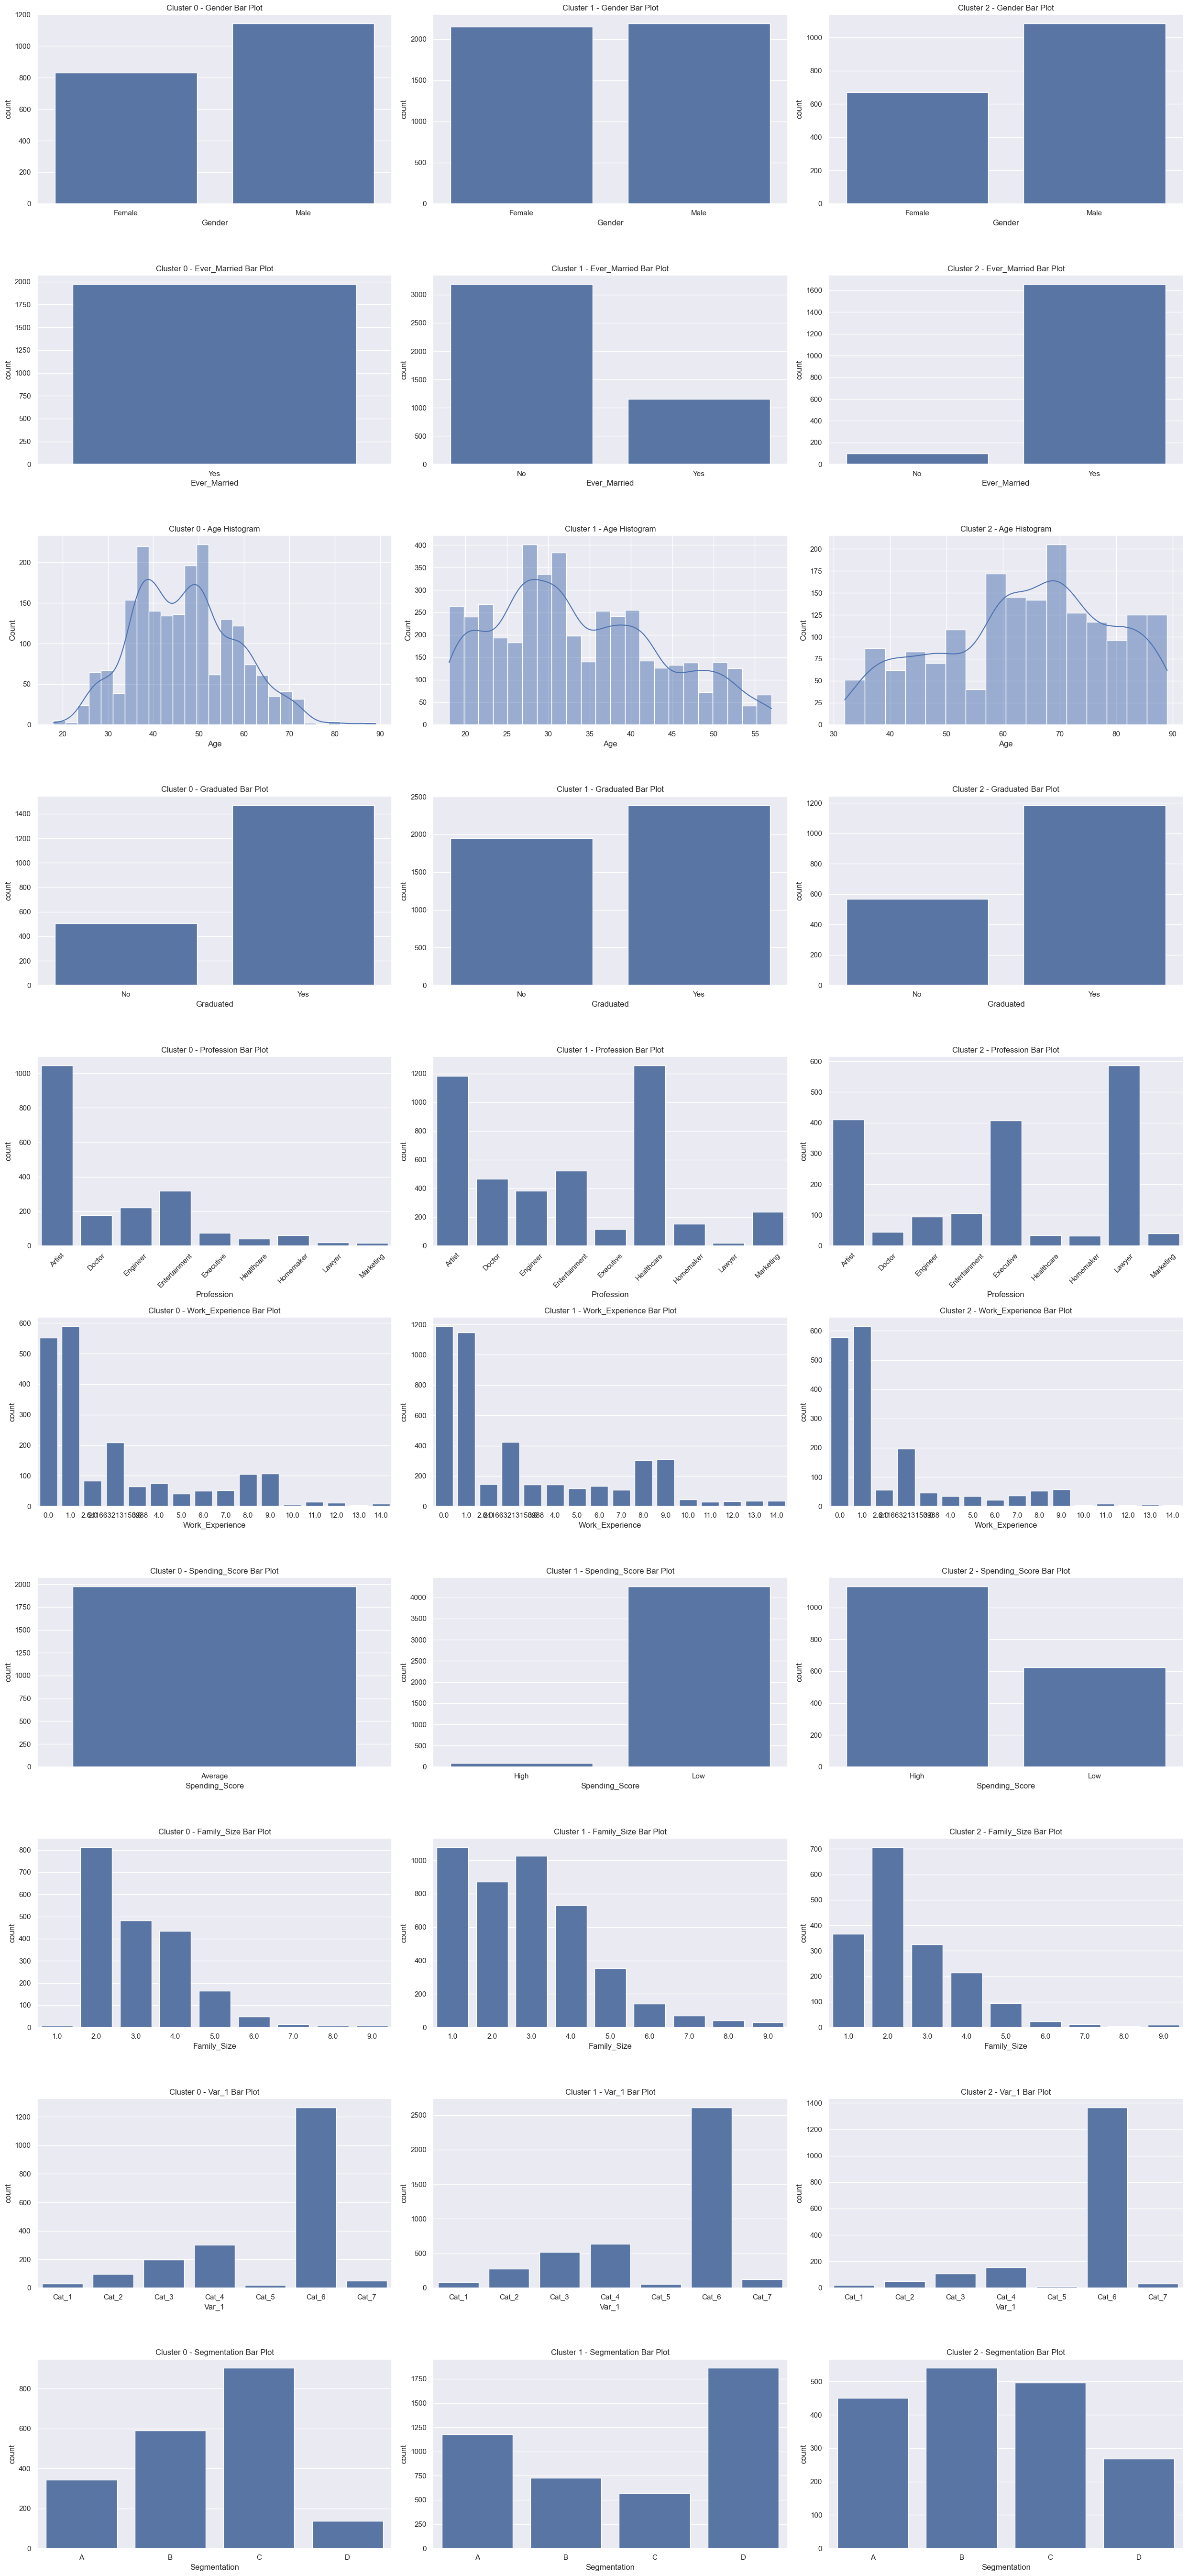

In [36]:

num_clusters = df_train['Cluster'].nunique()
clusters = df_train['Cluster'].unique()
clusters.sort()

# Select columns for which you want to plot distributions
columns_to_plot = df_train.columns

# Create a grid of subplots
fig, axes = plt.subplots(len(columns_to_plot)-1, num_clusters, figsize=(25, 5*len(columns_to_plot)-1))

# Iterate over each column
for i, column in enumerate(columns_to_plot):
    if column != 'Cluster':
      if column == 'Age':  # For 'age' column, plot histogram
          # Iterate over each cluster
          for cluster in clusters:
              # Select data for current cluster and call dataplot
              data = df_train[df_train['Cluster'] == cluster][column]
              sns.set(style='dark')
              # Plot the histogram in the corresponding subplot
              sns.histplot(data, kde=True, ax=axes[i, np.where(clusters == cluster)[0][0]])

              # Set title for the subplot
              axes[i, np.where(clusters == cluster)[0][0]].set_title(f'Cluster {cluster} - {column} Histogram')
      else:  # For other columns, plot bar plot
         # Iterate over each cluster
            for cluster in clusters:
                # Select data for current cluster
                data = df_train[df_train['Cluster'] == cluster]
                sns.set(style='dark')
                ax = axes[i, np.where(clusters == cluster)[0][0]]
                # Plot the bar plot in the corresponding subplot and specify the order for the countplot if it is string by adding part in code ,order.....
                sns.countplot(x=column, data=data, ax=ax, order=sorted(data[column].loc[data[column].apply(lambda x: isinstance(x, str))].unique()) if data[column].dtype == object else None)
                ax.set_title(f'Cluster {cluster} - {column} Bar Plot')

                # Rotate x-axis labels for 'Profession' chart
                if column == 'Profession':
                    ax.tick_params(axis='x', rotation=45)
# Adjust layout
plt.tight_layout()
plt.show()

To make it easier to compare the composition of each clutser in relation to each other, plot a stacked bar chart and group bar chart

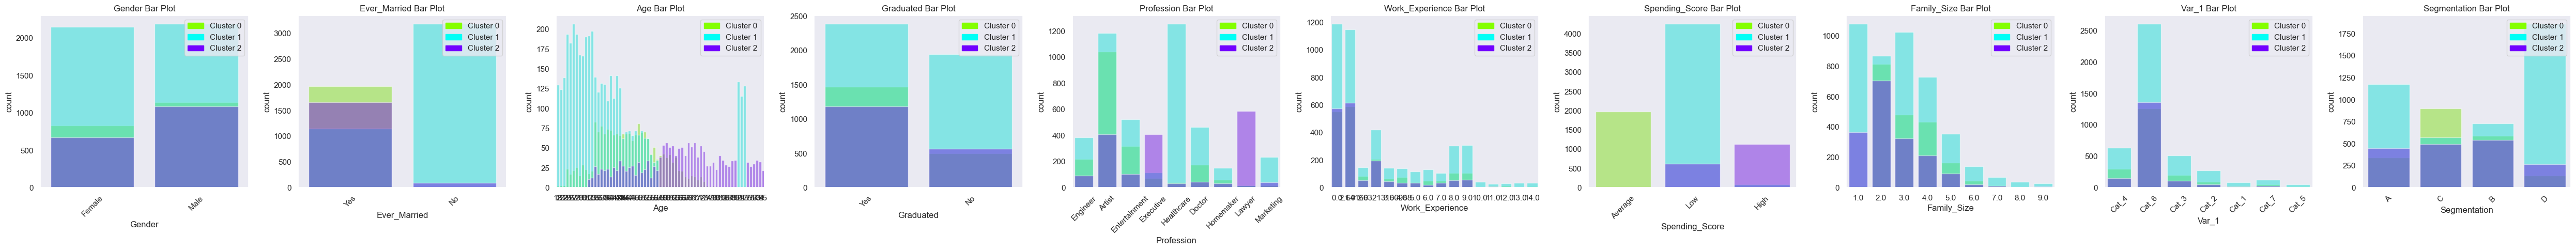

In [47]:
import matplotlib.patches as mpatches

num_clusters = df_train['Cluster'].nunique()
clusters = df_train['Cluster'].unique()
clusters.sort()

# Select columns for which you want to plot distributions
columns_to_plot = df_train.columns

# Create a grid of subplots
fig, axes = plt.subplots(1, len(columns_to_plot)-1, figsize=(5*(len(columns_to_plot)-1), 5))

# Iterate over each column
for i, column in enumerate(columns_to_plot):
    if column != 'Cluster':
        # Create a color palette for different clusters
        palette = sns.color_palette("hsv", num_clusters)
        # Create a dictionary to store the legend handles
        legend_handles = {}

        # Iterate over each cluster
        for j, cluster in enumerate(clusters):
            # Select data for current cluster
            dataplot = df_train[df_train['Cluster'] == cluster] # rename here to dataplot as well
            sns.set(style='dark')
            ax = axes[i]
            # Plot the bar plot in the corresponding subplot
            sns.countplot(x=column, data=dataplot, ax=ax, palette=[palette[j]], alpha=0.5)
            ax.set_title(f'{column} Bar Plot')

            # Add legend handle
            legend_handles[f'Cluster {cluster}'] = mpatches.Patch(color=palette[j], label=f'Cluster {cluster}')

            # Rotate x-axis labels if necessary
            if isinstance(dataplot[column].iloc[0], str):
                ax.tick_params(axis='x', rotation=45)

        # Add legend to the plot
        ax.legend(handles=legend_handles.values(), loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

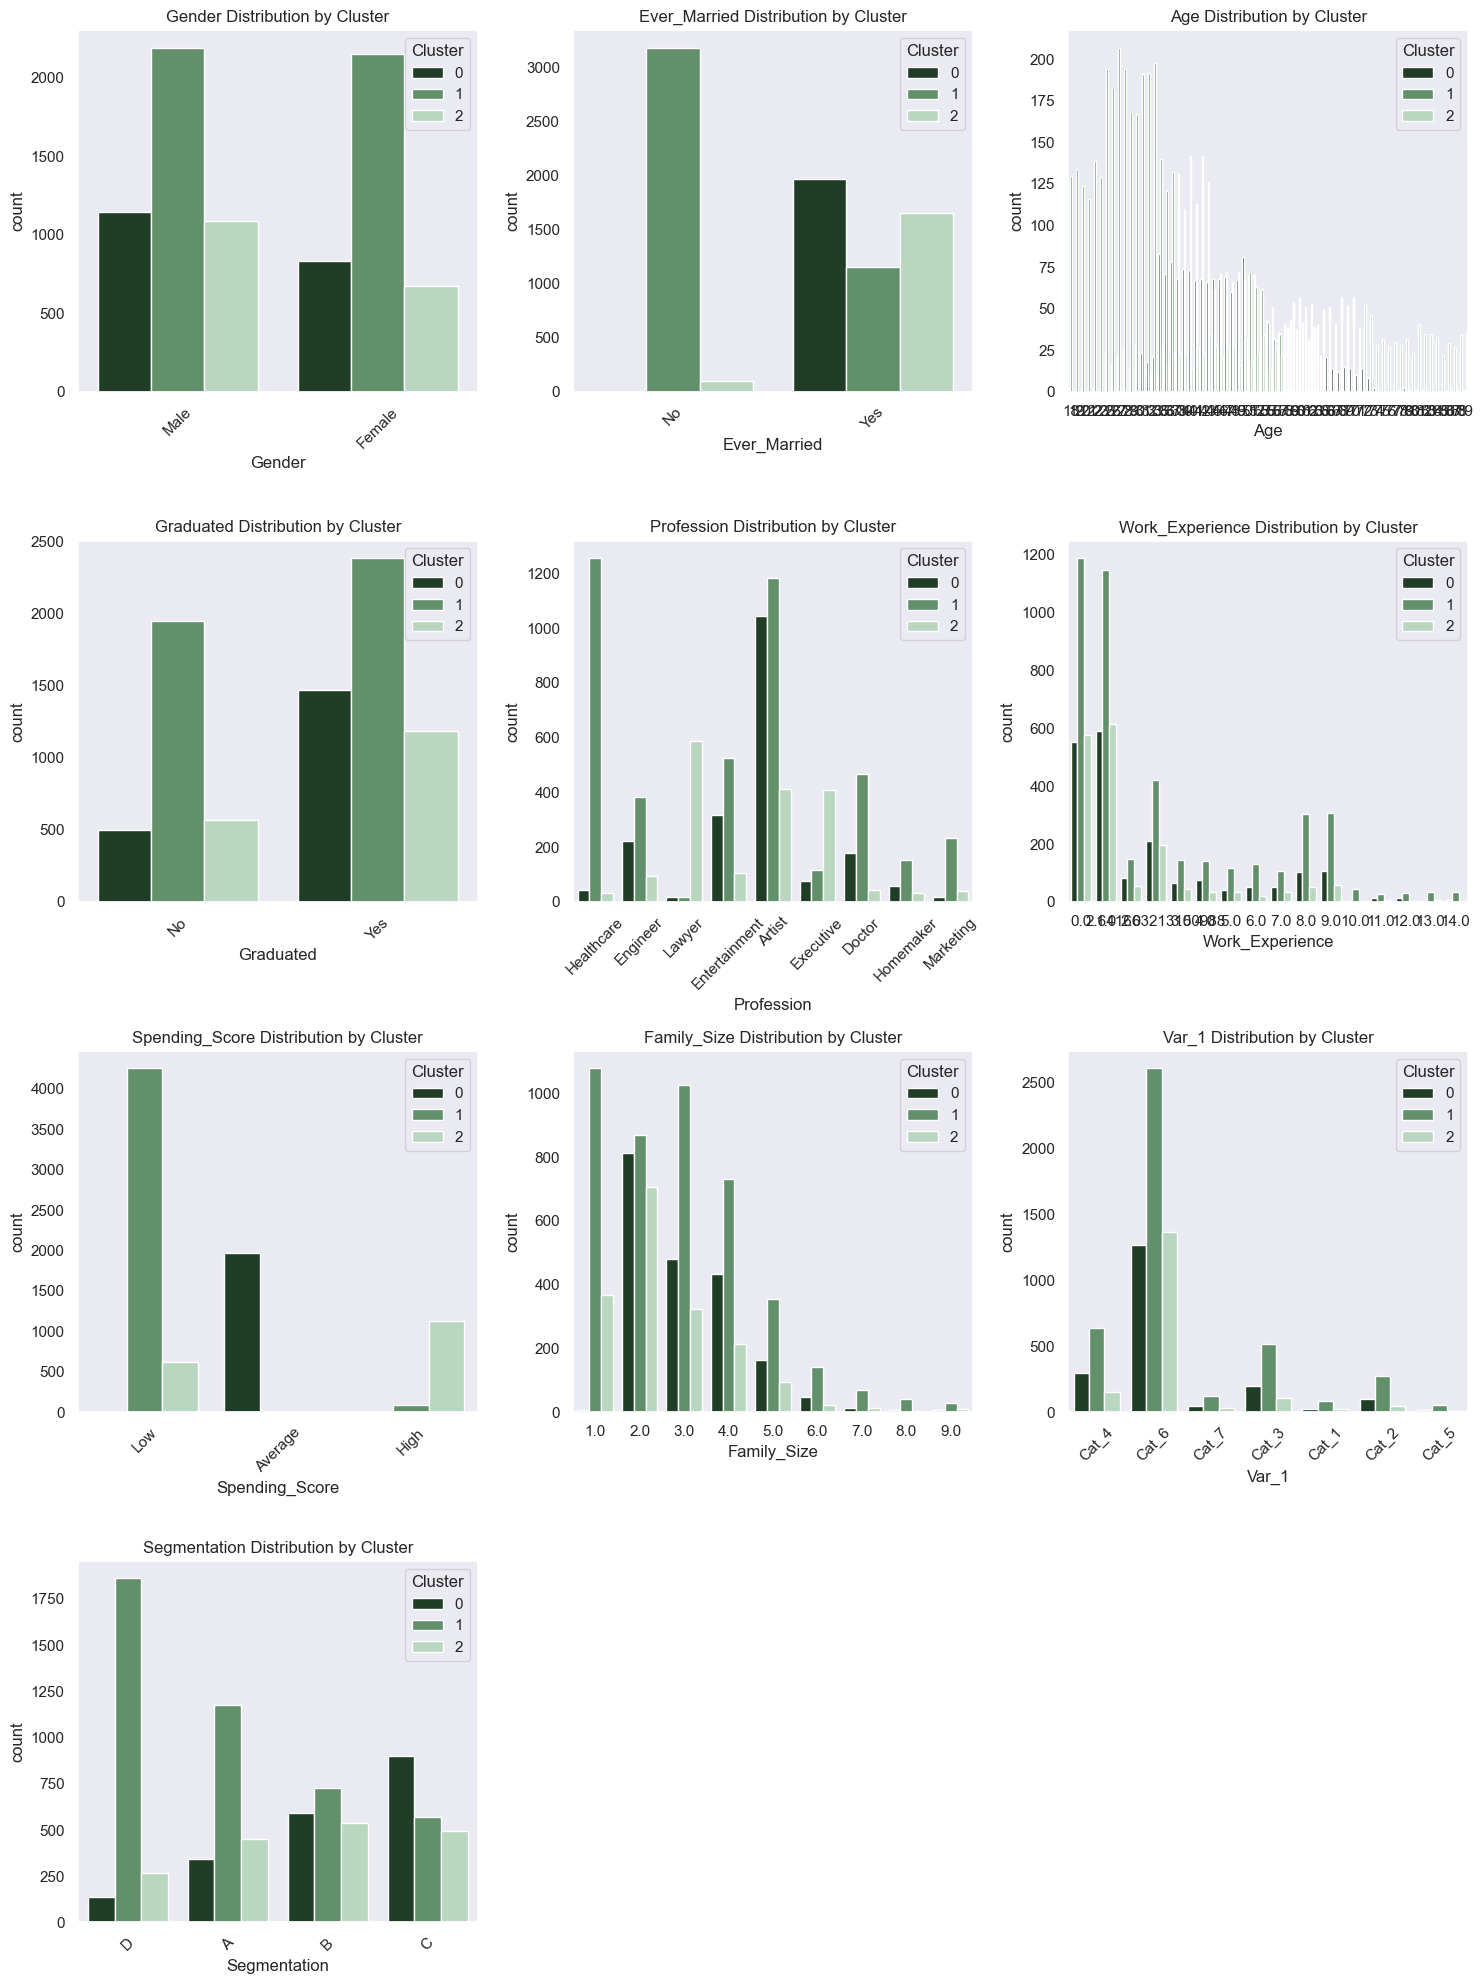

In [39]:
# Non-Stacked Version


import math

# Create a distinguishable color palette
palette = sns.cubehelix_palette(df_train['Cluster'].nunique(), start=2, rot=0, dark=0.2, light=0.8, reverse=True)

# Exclude 'Cluster' from columns to plot
columns_to_plot = [col for col in df_train.columns if col != 'Cluster']

# Determine number of rows based on the columns to plot
rows = math.ceil(len(columns_to_plot) / 3)
fig, axes = plt.subplots(rows, 3, figsize=(15, 5*rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate over each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.countplot(x=column, hue='Cluster', data=df_train, ax=ax, palette=palette)
    ax.set_title(f'{column} Distribution by Cluster')
    if isinstance(df_train[column].iloc[0], str):
        ax.tick_params(axis='x', rotation=45)

# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### PCA to compress all features in standardised data into two components

In [52]:
df_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Cluster
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D,1
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A,0
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B,2
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B,2
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A,2
...,...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0.000000,Low,7.0,Cat_1,D,1
8064,Male,No,35,No,Executive,3.000000,Low,4.0,Cat_4,D,1
8065,Female,No,33,Yes,Healthcare,1.000000,Low,1.0,Cat_6,D,1
8066,Female,No,27,Yes,Healthcare,1.000000,Low,4.0,Cat_6,B,1


Use Dummy encoding / One Hot encoding to preprocess the categorical variables into numerical format as when use Principal Component Analysis (PCA), the extra features will be compressed into 2 dimensions. PCA is designed to operate on numerical data and performs dimensionality reduction while preserving the variance structure of the original dataset so that underlying relationships and patterns in the data can be captured

In [76]:

## Perform dummy encoding with 'get_dummies function' on the categorical variables
# (In first encoding didnt drop original segmentation as was not choosing to feed the feature in the model)
data2 = pd.get_dummies(df_train, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score'])

# Drop the Segmentation and Variance column from data2 which exist in df_train and previous clusters if that has been added to df_train from above
data2.drop(columns=['Segmentation', 'Var_1'], inplace=True)
if 'Cluster' in data2.columns:
    data2.drop(columns='Cluster', inplace=True)

# Keep the non-categorical numerucal columns
data2['Age'] = df_train['Age']
data2['Work_Experience'] = df_train['Work_Experience']
data2['Family_Size'] = df_train['Family_Size']


In [77]:
data2

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.000000,4.0,False,True,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,38,2.641663,3.0,True,False,False,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
2,67,1.000000,1.0,True,False,False,True,False,True,False,...,True,False,False,False,False,False,False,False,False,True
3,67,0.000000,2.0,False,True,False,True,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,40,2.641663,6.0,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.000000,7.0,False,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
8064,35,3.000000,4.0,False,True,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
8065,33,1.000000,1.0,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
8066,27,1.000000,4.0,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True


In [75]:
data2
data2 = data2.astype(int) # it does convert them to numerical but it showes them as boolean not numeric therefore convert to numeric with this line
data2

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]])

In [59]:
# Scale Data

scaler = MinMaxScaler()
data2 = scaler.fit_transform(data2)
data2

array([[0.05633803, 0.07142857, 0.375     , ..., 0.        , 0.        ,
        1.        ],
       [0.28169014, 0.18869023, 0.25      , ..., 1.        , 0.        ,
        0.        ],
       [0.69014085, 0.07142857, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21126761, 0.07142857, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.12676056, 0.07142857, 0.375     , ..., 0.        , 0.        ,
        1.        ],
       [0.26760563, 0.        , 0.25      , ..., 1.        , 0.        ,
        0.        ]])

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcafeatures = pca.fit_transform(data2)
pcafeatures

array([[ 1.34474698,  0.95295596],
       [-0.87569195, -0.79959222],
       [-0.22708539, -0.87078329],
       ...,
       [ 0.9979204 , -0.90576224],
       [ 1.01823213, -0.88696047],
       [-1.13505272,  0.52146254]])

In [62]:
X_PCA = pcafeatures
X_PCA

array([[ 1.34474698,  0.95295596],
       [-0.87569195, -0.79959222],
       [-0.22708539, -0.87078329],
       ...,
       [ 0.9979204 , -0.90576224],
       [ 1.01823213, -0.88696047],
       [-1.13505272,  0.52146254]])

In [63]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X_PCA)

  wcss.append(kmeans.inertia_)

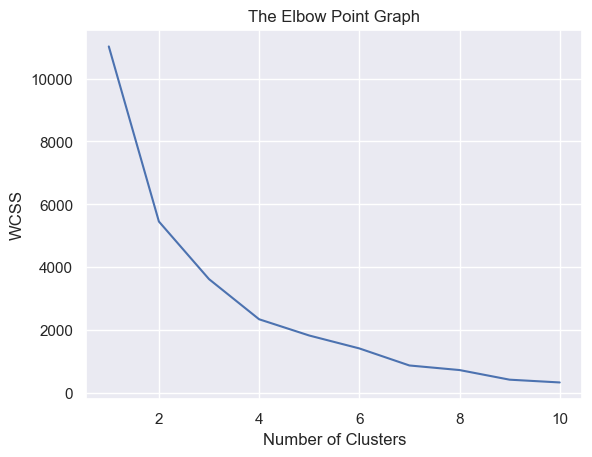

In [64]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [65]:
# Based on WCSS / silhoutte score, choose 3 clusters

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X_PCA)
df_train['Cluster'] = Y
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Cluster
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D,1
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A,0
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B,0
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B,0
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A,0


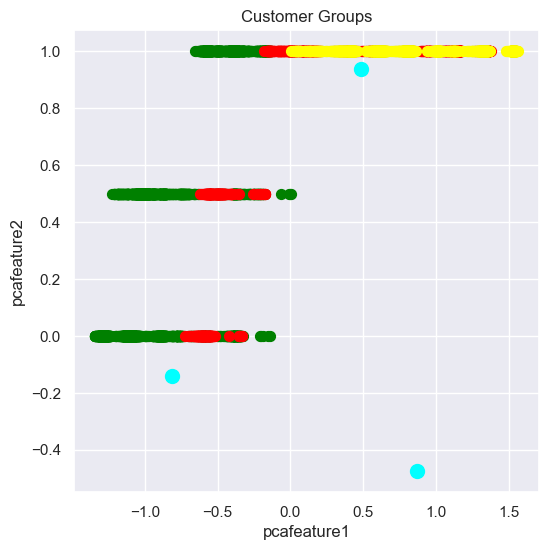

In [66]:
plt.figure(figsize=(6,6))
plt.scatter(X_PCA[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X_PCA[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X_PCA[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
#plt.scatter(X_PCA[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')



# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('pcafeature1')
plt.ylabel('pcafeature2')
plt.show()

There seems to be less segmentation in the above as green and red are overlapping quite a bit in the lines

In [67]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(X_PCA, Y)
print(silhouette_avg)

0.4383957319177343


### Hierarchical Clustering

Using the preprocessed data from above where have encoded the categorical variable using label econder and kept numerical variables as they are so all is encoded into numerical values to be understood by the model. Have stored in the datapreprocess dataframe that created. Will use 2 features to feed in, age and spending score given above the clusters were more clear for this dataset

In [37]:
datapreprocess

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age,Work_Experience,Family_Size
0,1,0,0,5,2,3,3,22,1.000000,4.0
1,0,1,1,2,0,3,0,38,2.641663,3.0
2,0,1,1,2,2,5,1,67,1.000000,1.0
3,1,1,1,7,1,5,1,67,0.000000,2.0
4,0,1,1,3,1,5,0,40,2.641663,6.0
...,...,...,...,...,...,...,...,...,...,...
8063,1,0,0,0,2,0,3,22,0.000000,7.0
8064,1,0,0,4,2,3,3,35,3.000000,4.0
8065,0,0,1,5,2,5,3,33,1.000000,1.0
8066,0,0,1,5,2,5,1,27,1.000000,4.0


In [44]:
X = datapreprocess.iloc[:,[7,4]]
X

,Age,Spending_Score
0,22,2
1,38,0
2,67,2
3,67,1
4,40,1
...,...,...
8063,22,2
8064,35,2
8065,33,2
8066,27,2


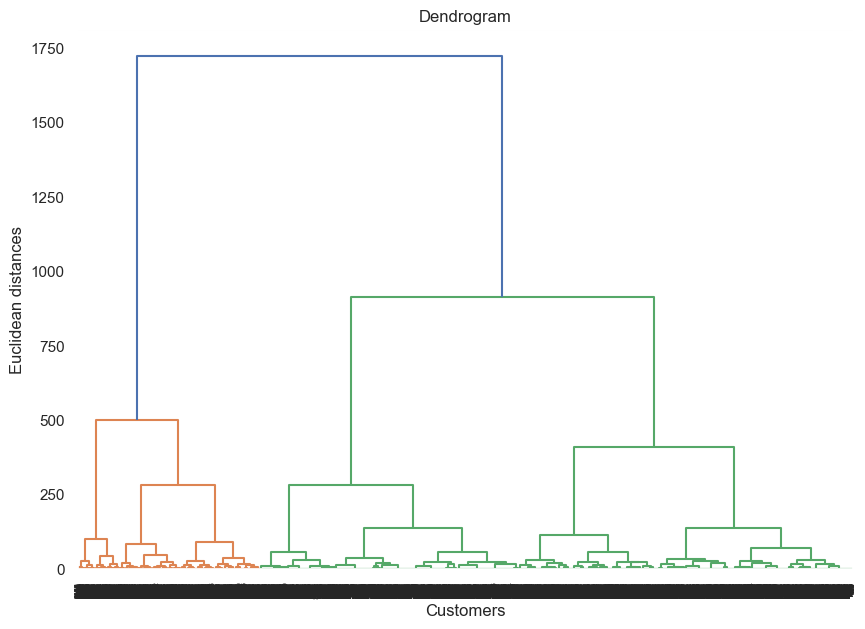

In [71]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))

dendograms = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering


# By setting linkage='ward', it is using Euclidean distance as the distance metric in the AgglomerativeClustering algorithm. This is because 'ward' linkage minimizes the variance when merging clusters, 
# which is equivalent to minimizing the Euclidean distances between the cluster centroids.
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
Y = cluster.fit_predict(X)
df = pd.DataFrame()
df['Cluster'] = Y
df

,Cluster
0,2
1,1
2,0
3,0
4,1
...,...
8063,2
8064,1
8065,2
8066,2


In [47]:
silhouette_avg = silhouette_score(X, Y)
print(silhouette_avg)

0.5567700344709648
